#### Checking if the file is running from correct venv/kernal
import sys
sys.executable

#### Check all running kernals
jupyter kernelspec list

#### Remove kernals
jupyter kernelspec remove <kernel-name-to-remove>

#### Register the venv as a Jupyter kernel
python -m ipykernel install --user --name my-venv --display-name "Python (my-venv)"


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pickle

In [8]:
df = pd.read_csv('placement_data.csv')
df.sample(5)

,Unnamed: 0,cgpa,iq,placement
82,82,6.5,37.0,1
76,76,4.9,155.0,0
46,46,5.3,114.0,0
9,9,5.1,66.0,0
77,77,7.3,50.0,1


In [9]:
df = df.iloc[:, 1:]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


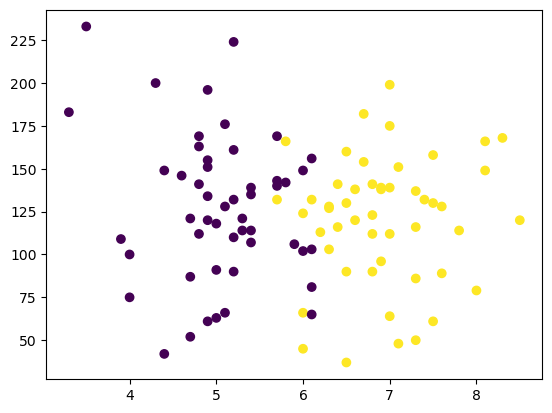

In [10]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

In [11]:
X = df.iloc[:, 0:2]
X.shape

(100, 2)

In [12]:
y = df.iloc[:, -1]
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((90, 2), (90,), (10, 2), (10,))

In [14]:
scaler = StandardScaler()

In [15]:
X_train = scaler.fit_transform(X_train)
X_train[0:5]

array([[-0.77750927,  0.11001119],
       [-1.47292129,  1.85724779],
       [ 0.87409428,  0.37695012],
       [ 0.00482925, -1.90416433],
       [ 0.00482925,  0.61962187]])

In [16]:
X_test = scaler.transform(X_test)
X_test[:5]

array([[-1.03828878, -0.27826361],
       [-0.69058277, -0.81214146],
       [-0.51672977, -0.22972926],
       [ 0.09175575,  0.20707989],
       [-0.08209725, -0.42386666]])

In [17]:
clf = LogisticRegression()

In [18]:
clf.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [19]:
y_pred = clf.predict(X_test)
y_pred, y_test

(array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0]),
 59    0
 28    0
 41    0
 71    1
 1     0
 52    1
 69    1
 46    0
 6     0
 36    0
 Name: placement, dtype: int64)

In [21]:
accuracy_score(y_test,y_pred)

1.0

In [23]:
X_train.dtype, y_train.dtype, y_train.values.dtype

(dtype('float64'), dtype('int64'), dtype('int64'))

<Axes: >

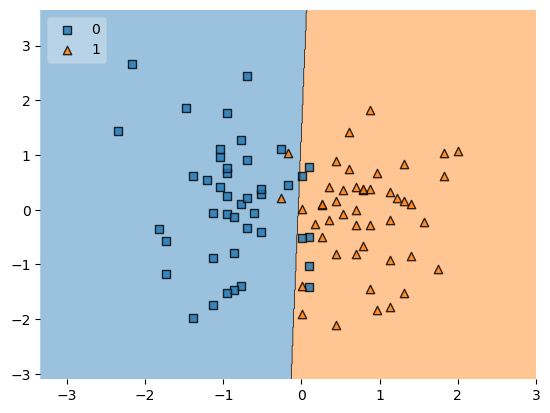

In [25]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

# X_train is Numpy array as it is a result of "scaler.fit_transform(X_train)" line
# Y_train is Pandas.series, need to be converted into Array.

In [26]:
pickle.dump(clf,open('model.pkl','wb'))